In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# import some data to play with
iris = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/iris.csv')

In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [ ]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [ ]:
iris['Species'].unique()

array([0, 1, 2])

In [ ]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [ ]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [ ]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model

DecisionTreeClassifier(max_depth=3)

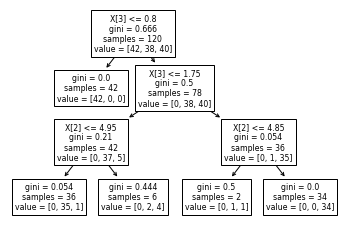

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

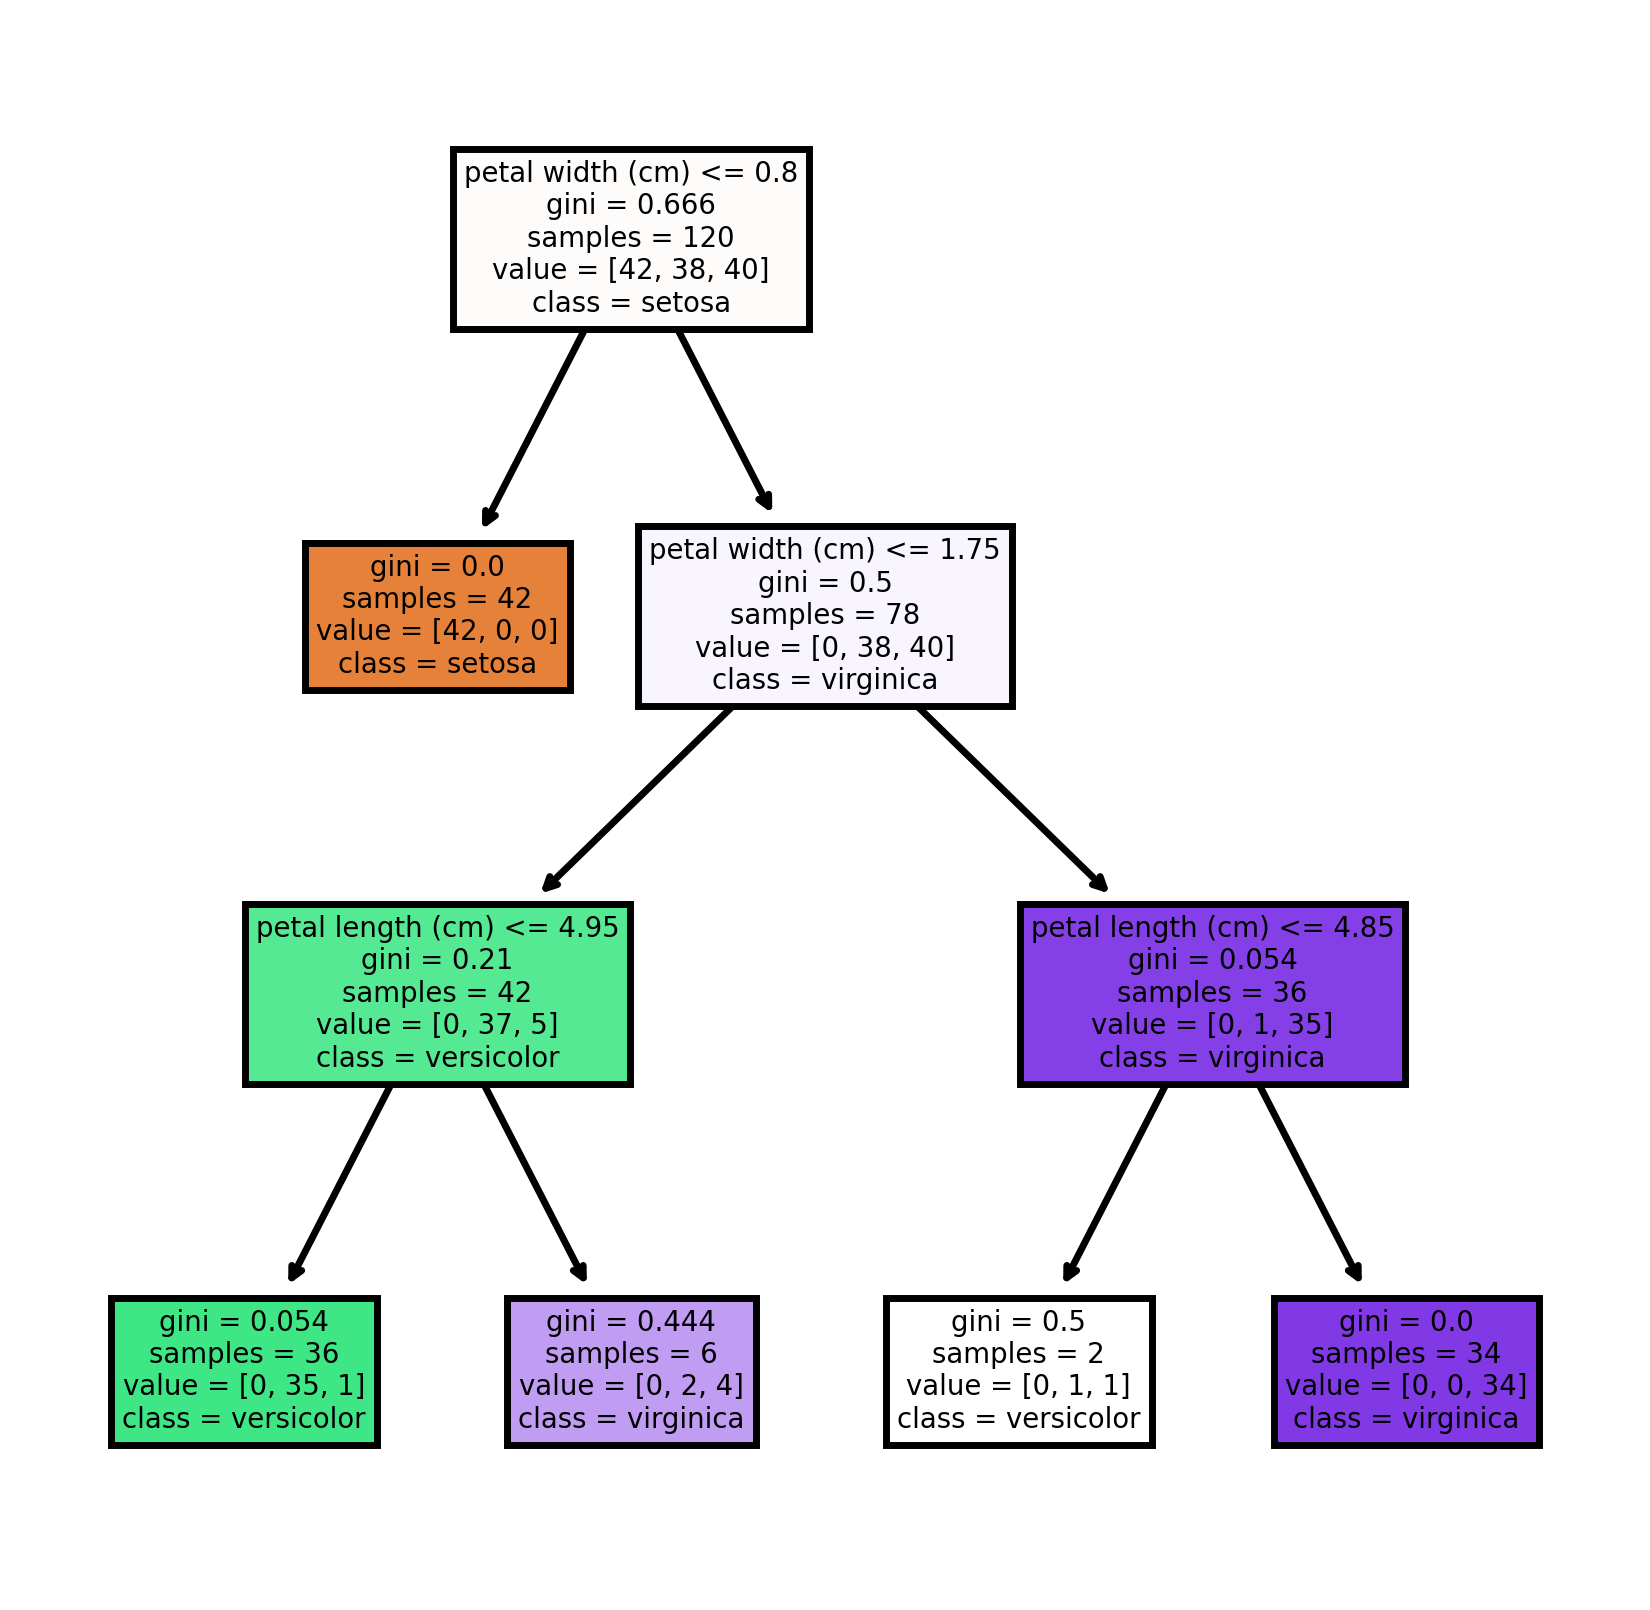

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] #.columns
cn=['setosa', 'versicolor', 'virginica']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [ ]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [ ]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [ ]:
preds,y_test

(array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
        1, 0, 1, 0, 0, 2, 0, 1]), 38     0
 66     1
 115    2
 117    2
 89     1
 136    2
 68     1
 94     1
 84     1
 28     0
 90     1
 11     0
 40     0
 126    2
 79     1
 144    2
 123    2
 124    2
 76     1
 59     1
 132    2
 105    2
 53     1
 17     0
 64     1
 18     0
 13     0
 116    2
 9      0
 81     1
 Name: Species, dtype: int64)

In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

np.mean(preds==y_test),accuracy_score(y_test,preds)

(0.9666666666666667, 0.9666666666666667)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

#### Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

0.872808860607516